In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [89]:
database = pd.read_csv('database.csv')

database.head()

,samples,type,NM_004900,AA085955,NM_014616,AK092846,NM_001539,THC2450799,NM_006709,NM_000978,...,AF117899,A_24_P287526,THC2349421,THC2272949,NM_138411,THC2350949,CR600872,NM_016058,AF520801,NM_203414
0,GSM831223_ATL-_1,ATL,7.759333,5.526977,9.279413,4.730458,11.097001,5.409710,6.194557,14.282856,...,5.856063,6.534970,6.035496,7.476790,4.866324,4.612706,6.109501,9.462370,4.612706,8.484984
1,GSM831224_ATL-_2,ATL,6.080513,5.503887,9.128079,4.903375,10.930584,4.631126,6.381124,14.280562,...,5.826412,6.413272,5.948900,5.948900,5.269268,4.698254,5.718088,9.490950,4.663896,7.095295
2,GSM831225_ATL-_3,ATL,9.594372,6.582465,9.838391,5.881773,11.568524,5.305547,6.743412,14.235741,...,5.548070,5.928725,6.013459,8.529502,5.471272,4.700643,5.834031,9.543813,4.882895,8.562290
3,GSM831226_ATL-_4,ATL,5.668196,5.513552,8.622807,4.830928,11.720891,4.651672,6.116554,14.611248,...,5.770464,6.347991,6.844252,8.372397,5.240151,5.073481,5.073481,10.083024,4.782399,6.541959
4,GSM831227_ATL-_5,ATL,7.979572,5.193283,8.893503,5.030561,11.073585,5.347932,6.014682,14.596186,...,5.383804,5.878142,5.353299,7.449356,5.224082,5.038731,5.279458,9.853553,4.671153,7.844617


(array([50.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 21.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

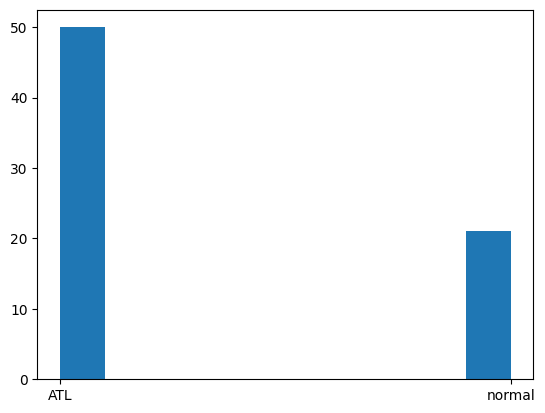

In [90]:
#visualizing the data as histogram
plt.hist(database['type'], bins=10)

In [91]:
# show the statistical data
# database.describe()

In [92]:
database.info(max_cols=1000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Columns: 33581 entries, samples to NM_203414
dtypes: float64(33579), object(2)
memory usage: 18.2+ MB


In [93]:
# randomize the data
database = database.drop('samples', axis=1)
#replace the type column with 0 and 1 using loc
database.loc[database['type'] == 'normal', 'type'] = 0
database.loc[database['type'] == 'ATL', 'type'] = 1

database['type'] = database['type'].astype(int)


X = database.drop('type', axis=1)
y = database['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

#set the type column as the first column
cols = list(train_data.columns)
cols.insert(0, cols.pop(cols.index('type')))
train_data = train_data.loc[:, cols]
test_data = test_data.loc[:, cols]


,NM_004900,AA085955,NM_014616,AK092846,NM_001539,THC2450799,NM_006709,NM_000978,T12590,A_24_P704878,...,A_24_P287526,THC2349421,THC2272949,NM_138411,THC2350949,CR600872,NM_016058,AF520801,NM_203414,type
56,5.780098,5.332213,8.695389,5.098792,11.504040,4.667233,5.712521,14.662024,5.659510,4.695946,...,6.838627,6.750608,6.299021,5.201005,5.246459,6.362788,9.393258,4.674824,8.168902,0
33,8.243285,5.523849,9.600420,5.069879,12.258064,4.602893,6.093721,14.244807,4.905212,4.580993,...,6.607685,6.242202,6.359903,4.753238,4.789456,4.829021,9.619211,4.580993,6.842617,1
17,6.763690,5.724825,9.300518,4.816739,12.153731,4.619026,6.664933,14.028837,5.331722,4.588992,...,6.590408,7.239204,7.213075,4.588992,4.611537,5.141758,9.602583,4.561730,9.313434,1
35,9.587436,5.162081,9.143234,4.940562,11.011384,4.722193,5.947677,14.673703,5.456959,4.642830,...,6.277073,6.352663,7.396886,4.817527,4.997572,5.551604,9.801314,4.552052,6.926394,1
57,7.769630,5.050160,8.936854,4.844497,11.368191,4.637939,5.513309,14.741086,5.685872,4.681459,...,6.693831,6.294204,5.729153,4.806720,5.244516,5.790496,9.322228,4.666725,6.858703,0


In [94]:
database.info(max_cols=1000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Columns: 33580 entries, type to NM_203414
dtypes: float64(33579), int64(1)
memory usage: 18.2 MB


(array([ 6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 16.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

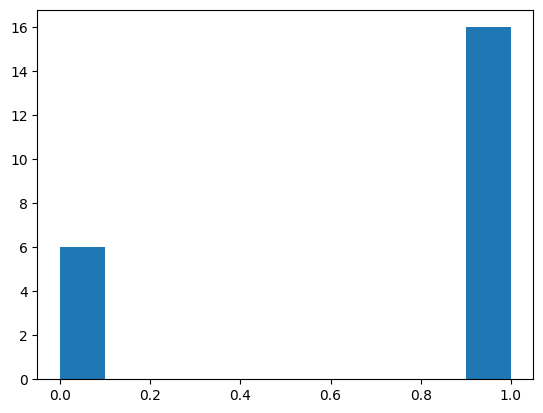

In [95]:
# plot the histogram of the testing data to see the distribution
plt.hist(test_data['type'])

In [96]:
%pip install torch

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [97]:
train_data.info(max_cols=1000)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 56 to 8
Columns: 33580 entries, NM_004900 to type
dtypes: float64(33579), int64(1)
memory usage: 12.6 MB


In [98]:
import torch.nn as nn

columnsSize = len(train_data.columns) - 1

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(columnsSize, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        return self.fc3(self.relu(self.fc2(self.relu(self.fc1(x)))))

In [87]:
model = Model()

import torch.optim as optim
import torch

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# convert the data into tensor
train_data_to_model = torch.tensor(train_data.values).float()
test_data_to_model = torch.tensor(test_data.values).float()


# train the model
epochs = 1000
for i in range(epochs):
    model.train()
    logits = model(train_data_to_model[:, 1:]).squeeze()
    loss = criterion(logits, train_data_to_model[:, 0])
    accuracy_score = ((logits >= 0.5) == train_data_to_model[:, 0]).float().mean()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

model.eval()

# test the model
logits = model(test_data_to_model[:, 1:]).squeeze()
loss = criterion(logits, test_data_to_model[:, 0])
accuracy_score = ((logits >= 0.5) == test_data_to_model[:, 0]).float().mean()

print('Accuracy score: ', accuracy_score)
print('Loss: ', loss)



Accuracy score:  tensor(0.)
Loss:  tensor(-7.6488e+09, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
